In [2]:
from matplotlib import pyplot as plt
import os
import numpy as np
%matplotlib inline

In [65]:
# all data folders
all_folders = [folder for folder in os.listdir() if folder.startswith("long_1") or folder.startswith("long_2")]
all_folders

['long_1499',
 'long_1551',
 'long_1551_2',
 'long_1551_3',
 'long_1599',
 'long_1649',
 'long_1699',
 'long_1750',
 'long_2001']

In [32]:
%%time
datafolder = "long_1599/"
raw_data=[]
for file in os.listdir(datafolder):
    data = ""
    with open(f"{datafolder}{file}","r") as f:
        data = f.readlines()
    raw_data.append( [int(d.split(",")[0]) for d in data[25:]] )
raw_data = np.array(raw_data)

Wall time: 10 s


In [60]:
header = data[:25]

In [53]:
scope_settings = [d[:-2] for i,d in list(enumerate(data)) if i in [4,12,13,15,19]]
print(scope_settings)
trigger_level = float(data[4].split(",")[1])
vert_scale = float(data[12].split(",")[1])
vert_pos = float(data[13].split(",")[1])
trigger_level,vert_scale,vert_pos,np.max(raw_data),np.min(raw_data)

['Trigger Level,8.000E-01', 'Vertical Scale,2.000e-01', 'Vertical Position,-6.800e-01', 'Horizontal Scale,2.000E-06', 'Sampling Period,2.000e-09']


(0.8, 0.2, -0.68, 127, -3)

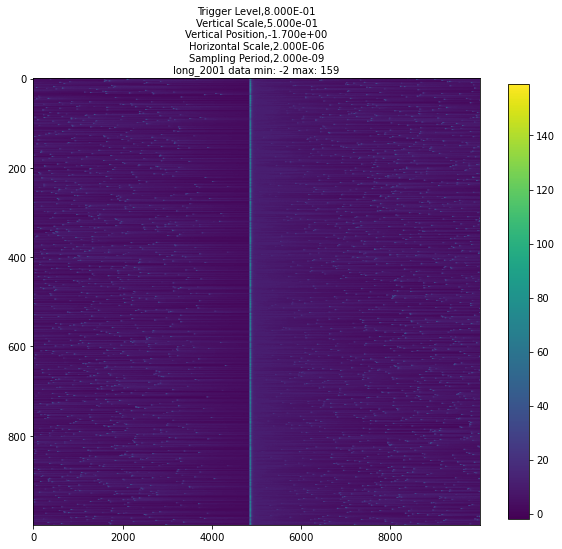

Wall time: 1.71 s


In [74]:
%%time
fig,ax = plt.subplots(figsize=(10,10))
im = ax.imshow(np.array(raw_data),interpolation=None,aspect=10)
plt.colorbar(im,ax=ax,shrink=0.8)
ax.set_title("\n".join(scope_settings)+"\n"+datafolder+f" data min: {np.min(raw_data)} max: {np.max(raw_data)}",fontsize=10)
plt.show()

# how does `trigger level`, `input voltage` affect the distribution of peaks?

Wall time: 51.7 s


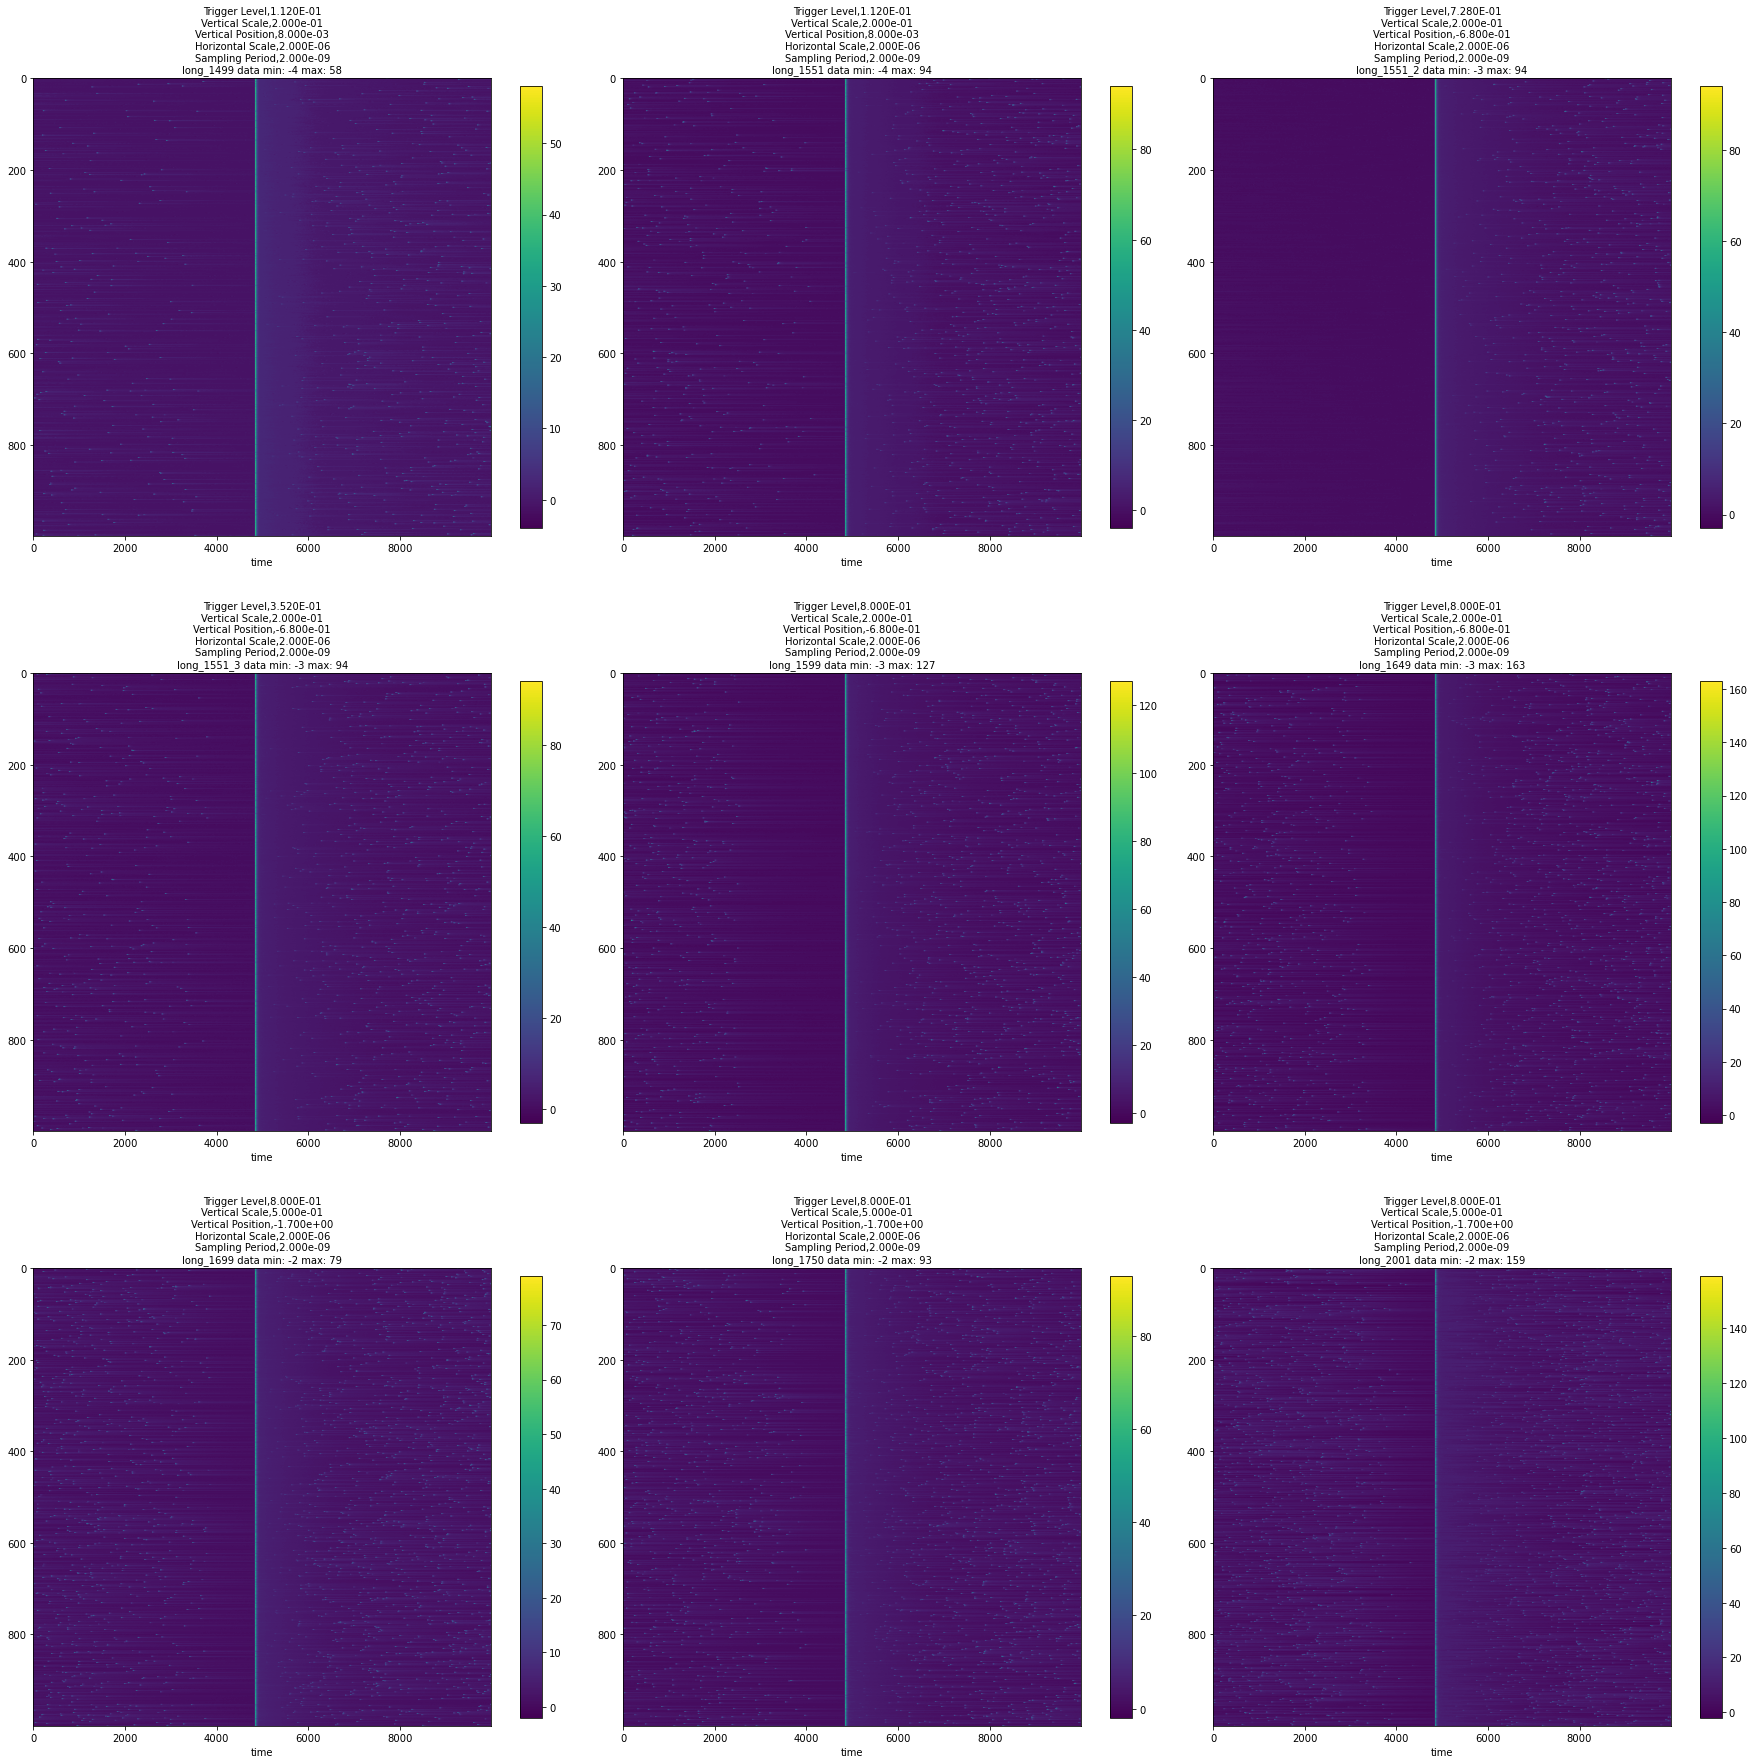

In [76]:
%%time
fig,axx = plt.subplots(3,3,figsize=(25,25))
axx=axx.ravel()
for i,datafolder in enumerate(all_folders):
    ax=axx[i]
    raw_data=[]
    for file in os.listdir(datafolder)[:1000]:
        data = ""
        with open(f"{datafolder}/{file}","r") as f:
            data = f.readlines()
        raw_data.append( [int(d.split(",")[0]) for d in data[25:]] )
    raw_data = np.array(raw_data)
    scope_settings = [d[:-2] for i,d in list(enumerate(data)) if i in [4,12,13,15,19]]
    # print(scope_settings)
    trigger_level = float(data[4].split(",")[1])
    vert_scale = float(data[12].split(",")[1])
    vert_pos = float(data[13].split(",")[1])
    trigger_level,vert_scale,vert_pos,np.max(raw_data),np.min(raw_data)
    im = ax.imshow(np.array(raw_data),interpolation=None,aspect=10)
    plt.colorbar(im,ax=ax,shrink=0.8)
    ax.set_title("\n".join(scope_settings)+"\n"+datafolder+f" data min: {np.min(raw_data)} max: {np.max(raw_data)}",fontsize=10)
    ax.set_xlabel("time")
plt.tight_layout()
plt.savefig("results_comparing_triggerlevel_voltage.png",dpi=100)